<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Chicago Crimes Situation EDA and Prediction</strong></p>

<img style="margin-left: 10%; float: center;border:5px solid #ffb037;width:80%; max-height: 80%;" src="https://www.gannett-cdn.com/-mm-/8feaaab14d7b65ae58708871aa2b081b20258548/c=0-48-4034-2324/local/-/media/USATODAY/test/2013/12/14//1387050313000-XXX-chicago-murder-capital09.JPG?width=1024&height=643">


<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [EDA](#2.0)
    * [1. How does crime types vary over time and location?](#2.1)
    * [2. Whether the incident was domestic-related as defined by the Illinois Domestic Violence Act?](#2.2)
    * [3. Weekly distribution of crime incidents.](#2.3)
    * [4. Analysis of crime situation related to Location type.](#2.4)
    
* [Data Pre Processing](#3.0)
* [Model Building](#4.0)
    * [Logistic Regression](#4.1)
    * [Knn](#4.2)
    * [Decision Tree Classifier](#4.3)
    * [Random Forest Classifier](#4.4)
    * [Ada Boost Classifier](#4.5)
    * [Gradient Boosting Classifier](#4.6)
    * [XgBoost](#4.7)
    * [Cat Boost Classifier](#4.8)
    * [Extra Trees Classifier](#4.9)
    * [LGBM Classifier](#4.10)

* [Models Comparison](#5.0)


### Note: Trainning for these 10 models may take more than 5 hours;
**Configuration:  
RAM: 16GB  
CPU: i7-8750H CPU @2.2GHZ  
Graphics card: GTX1060(desktop)**

In [39]:
# pip install missingno
# pip install catboost
# pip install lightgbm
# pip install plotly

In [40]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [41]:
# reading data
df = pd.read_csv('Chicago_Crimes_DataSet/Chicago_Crimes_2012_to_2017.csv')
df.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0            APARTMENT    True      True  1022      10.0  24.0   
1            RESIDENCE   False      True   313       3.0  20.0   
2               STREET   False     False  1524      15.0  37.0   
3             SIDEWALK   False     False  1532      15.0  28.0   
4            RESIDENCE   False      True  1523      15.0  28.0   

   Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0            29.0      08B     1154907.0     1893681.0  2016   
1            42.0      08B     1183066.0     1864330.0  2016   
2            25.0       24     1140789.0     1904819.0  2016   
3            25.0      08B     1143223.0     1901475.0  2016   
4            25.0       06     1139890.0     1901675.0  2016   

               Updated On   Latitude  Longitude                       Location  
0  05/10/2016 03:56:50 PM  41.864073 -87.706819  (41.864073157, -87.706818608)  
1  05/10/2016 03:56:50 PM  41.782922 -87.604363   (41.782921527, -87.60436317)  
2  05/10/2016 03:56:50 PM  41.894908 -87.758372  (41.894908283, -87.758371958)  
3  05/10/2016 03:56:50 PM  41.885687 -87.749516  (41.885686845, -87.749515983)  
4  05/10/2016 03:56:50 PM  41.886297 -87.761751  (41.886297242, -87.761750709)

In [42]:
df.describe()

Unnamed: 0            ID          Beat      District          Ward  \
count  1.456714e+06  1.456714e+06  1.456714e+06  1.456713e+06  1.456700e+06   
mean   3.308606e+06  9.597550e+06  1.150644e+03  1.125920e+01  2.287027e+01   
std    1.235350e+06  8.083505e+05  6.916466e+02  6.904691e+00  1.380589e+01   
min    3.000000e+00  2.022400e+04  1.110000e+02  1.000000e+00  1.000000e+00   
25%    2.698636e+06  9.002709e+06  6.130000e+02  6.000000e+00  1.000000e+01   
50%    3.063654e+06  9.605776e+06  1.024000e+03  1.000000e+01  2.300000e+01   
75%    3.428849e+06  1.022577e+07  1.711000e+03  1.700000e+01  3.400000e+01   
max    6.253474e+06  1.082788e+07  2.535000e+03  3.100000e+01  5.000000e+01   

       Community Area  X Coordinate  Y Coordinate          Year      Latitude  \
count    1.456674e+06  1.419631e+06  1.419631e+06  1.456714e+06  1.419631e+06   
mean     3.745632e+01  1.164398e+06  1.885523e+06  2.013897e+03  4.184147e+01   
std      2.144029e+01  1.850835e+04  3.424775e+04  1.449584e+00  9.430126e-02   
min      0.000000e+00  0.000000e+00  0.000000e+00  2.012000e+03  3.661945e+01   
25%      2.300000e+01  1.152544e+06  1.858762e+06  2.013000e+03  4.176787e+01   
50%      3.200000e+01  1.166021e+06  1.891502e+06  2.014000e+03  4.185797e+01   
75%      5.600000e+01  1.176363e+06  1.908713e+06  2.015000e+03  4.190529e+01   
max      7.700000e+01  1.205119e+06  1.951573e+06  2.017000e+03  4.202271e+01   

          Longitude  
count  1.419631e+06  
mean  -8.767224e+01  
std    6.661726e-02  
min   -9.168657e+01  
25%   -8.771528e+01  
50%   -8.766613e+01  
75%   -8.762813e+01  
max   -8.752453e+01

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [44]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Unnamed: 0                      0                0.000000
ID                              0                0.000000
Case Number                     1                0.000069
Date                            0                0.000000
Block                           0                0.000000
IUCR                            0                0.000000
Primary Type                    0                0.000000
Description                     0                0.000000
Location Description         1658                0.113818
Arrest                          0                0.000000
Domestic                        0                0.000000
Beat                            0                0.000000
District                        1                0.000069
Ward                           14                0.000961
Community Area                 40                0.002746
FBI Code                        0                0.000000
X Coordinate                37083                2.545661
Y Coordinate                37083                2.545661
Year                            0                0.000000
Updated On                      0                0.000000
Latitude                    37083                2.545661
Longitude                   37083                2.545661
Location                    37083                2.545661

In [45]:
# filling null values with zero

df.fillna(0, inplace = True)

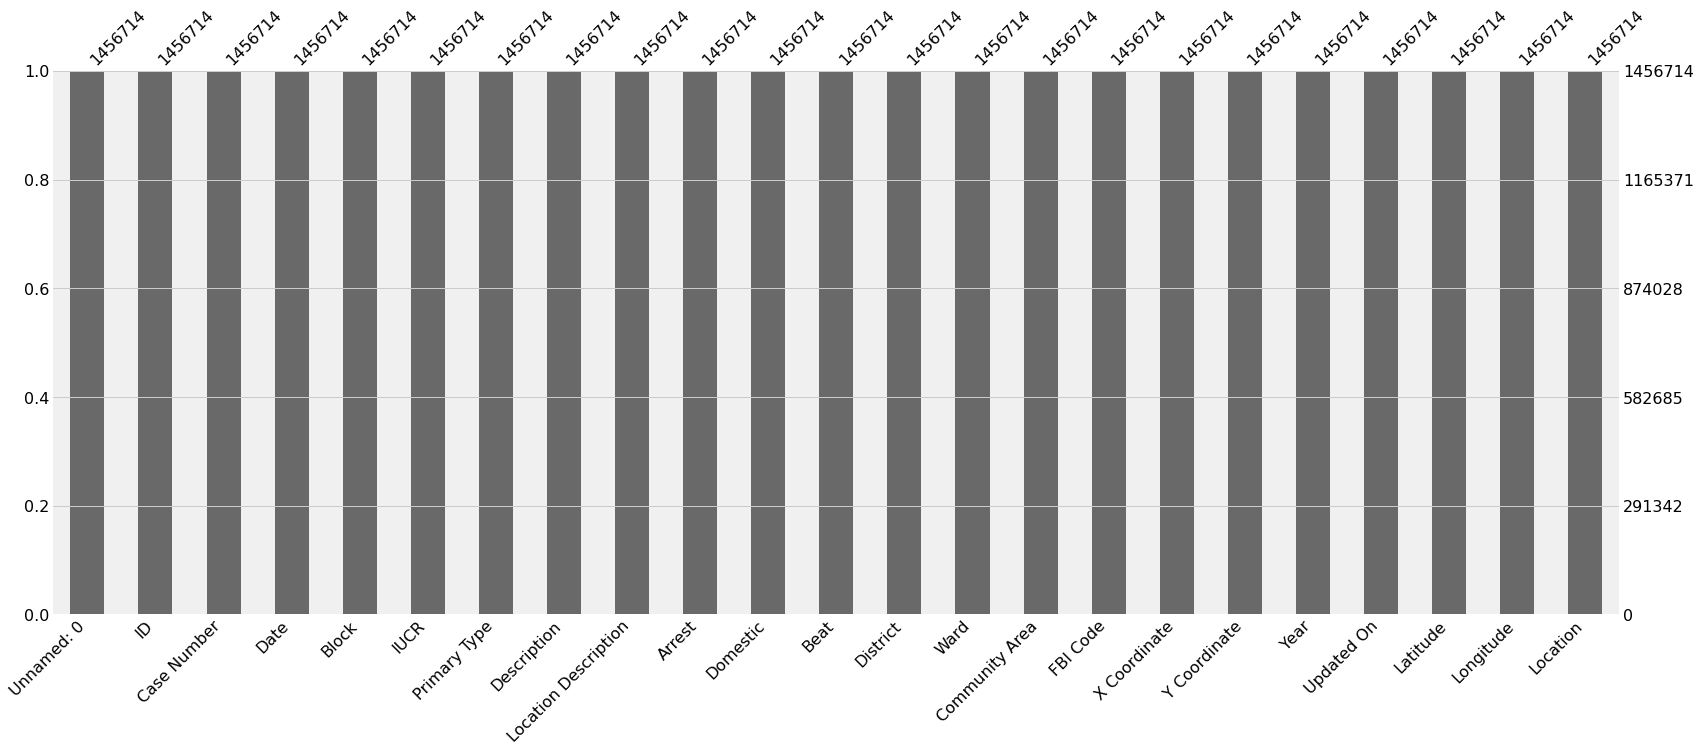

In [46]:
# visualizing null values
msno.bar(df)
plt.show()

In [47]:
# # adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
# filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
# df[filter]

# df = df[~filter]
df

Unnamed: 0        ID Case Number                    Date  \
0                 3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1                89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2               197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3               673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4               911  10508699    HZ250455  05/03/2016 10:00:00 PM   
...             ...       ...         ...                     ...   
1456709     6250330  10508679    HZ250507  05/03/2016 11:33:00 PM   
1456710     6251089  10508680    HZ250491  05/03/2016 11:30:00 PM   
1456711     6251349  10508681    HZ250479  05/03/2016 12:15:00 AM   
1456712     6253257  10508690    HZ250370  05/03/2016 09:07:00 PM   
1456713     6253474  10508692    HZ250517  05/03/2016 11:38:00 PM   

                        Block  IUCR            Primary Type  \
0          013XX S SAWYER AVE  0486                 BATTERY   
1          061XX S DREXEL AVE  0486                 BATTERY   
2         053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
3           049XX W FULTON ST  0460                 BATTERY   
4           003XX N LOTUS AVE  0820                   THEFT   
...                       ...   ...                     ...   
1456709       026XX W 23RD PL  0486                 BATTERY   
1456710   073XX S HARVARD AVE  1310         CRIMINAL DAMAGE   
1456711       024XX W 63RD ST  041A                 BATTERY   
1456712  082XX S EXCHANGE AVE  0486                 BATTERY   
1456713       001XX E 75TH ST  5007           OTHER OFFENSE   

                     Description            Location Description  Arrest  \
0        DOMESTIC BATTERY SIMPLE                       APARTMENT    True   
1        DOMESTIC BATTERY SIMPLE                       RESIDENCE   False   
2               RECKLESS CONDUCT                          STREET   False   
3                         SIMPLE                        SIDEWALK   False   
4                 $500 AND UNDER                       RESIDENCE   False   
...                          ...                             ...     ...   
1456709  DOMESTIC BATTERY SIMPLE                       APARTMENT    True   
1456710              TO PROPERTY                       APARTMENT    True   
1456711      AGGRAVATED: HANDGUN                        SIDEWALK   False   
1456712  DOMESTIC BATTERY SIMPLE                        SIDEWALK   False   
1456713  OTHER WEAPONS VIOLATION  PARKING LOT/GARAGE(NON.RESID.)    True   

         Domestic  Beat  District  Ward  Community Area FBI Code  \
0            True  1022      10.0  24.0            29.0      08B   
1            True   313       3.0  20.0            42.0      08B   
2           False  1524      15.0  37.0            25.0       24   
3           False  1532      15.0  28.0            25.0      08B   
4            True  1523      15.0  28.0            25.0       06   
...           ...   ...       ...   ...             ...      ...   
1456709      True  1034      10.0  28.0            30.0      08B   
1456710      True   731       7.0  17.0            69.0       14   
1456711     False   825       8.0  15.0            66.0      04B   
1456712      True   423       4.0   7.0            46.0      08B   
1456713     False   323       3.0   6.0            69.0       26   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0           1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1           1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2           1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3           1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4           1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   
...               ...           ...   ...                     ...        ...   
1456709     1159105.0     1888300.0  2016  05/10/2016 03:56:50 PM  41.849222   
1456710     1175230.0     1856183.0  2016  05/10/2016

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

<a id = '2.1'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>1.How does crime types vary over time and location?</strong></p> 

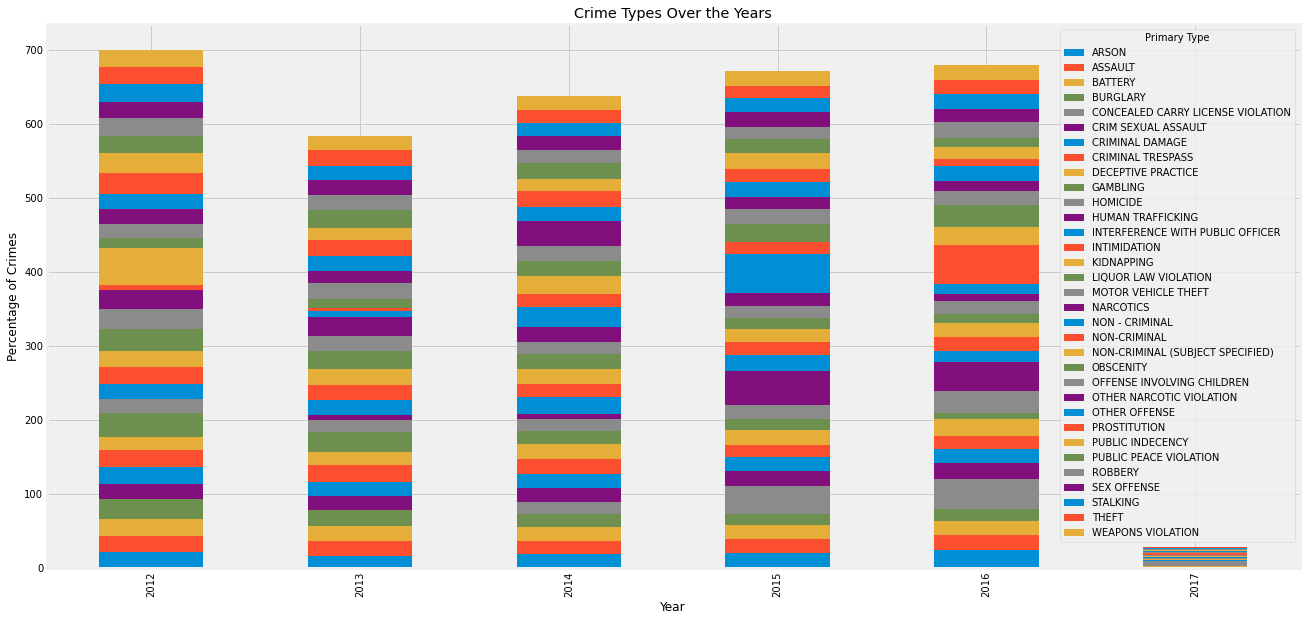

In [48]:
# 根据犯罪类型和年份分组统计数量
grouped = df.groupby(['Year','Primary Type']).size()

# 计算每个犯罪类型在每个年份的比例
grouped_pct = grouped.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))

# 绘制百分比堆积柱状图
fig, ax = plt.subplots(figsize=(20, 10))
grouped_pct.unstack().plot(kind='bar', stacked=True, ax=ax)

# 设置图表属性
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Crimes')
ax.set_title('Crime Types Over the Years')

# 显示图表
plt.show()


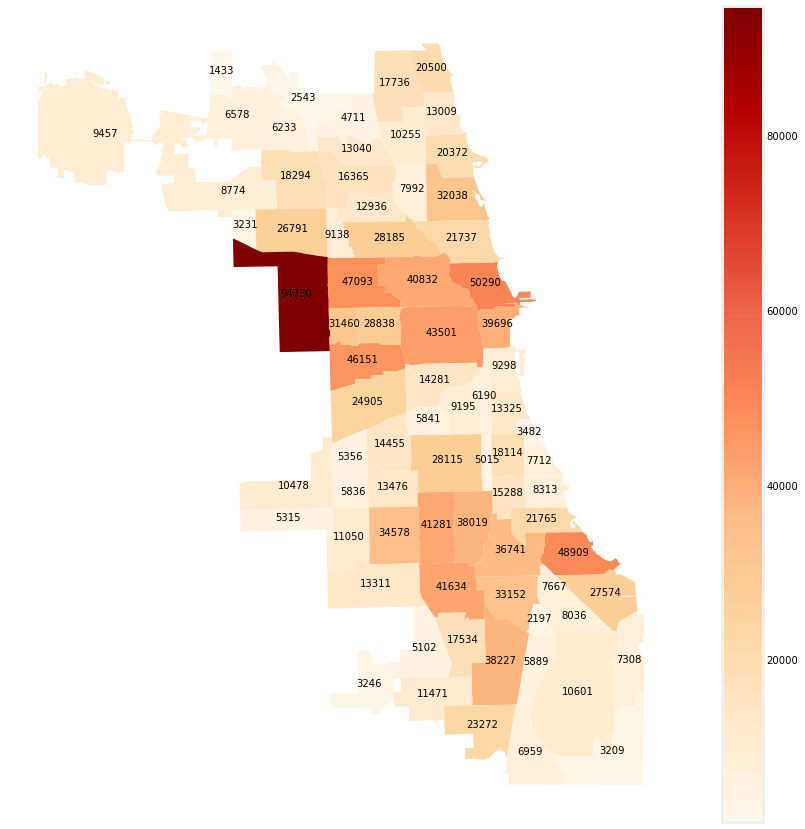

In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df1=df

# 加载GeoJSON文件
chicago = gpd.read_file('Chicago_Crimes_DataSet/chicago_community_areas.geojson')

# 匹配GeoJSON中的area_numbe与CSV中的Community Area
df1['area_numbe'] = df['Community Area'].astype(int).astype(str)
df1 = df.merge(chicago, on='area_numbe')

# 计算每个Community Area的犯罪事件总数
crime_count = df.groupby('area_numbe').size().reset_index(name='crime_count')

# 将结果与GeoJSON合并，并呈现在地图上
chicago = chicago.merge(crime_count, on='area_numbe')
ax = chicago.plot(column='crime_count', cmap='OrRd', legend=True, figsize=(15, 15))

# 添加每个区域的标签
for idx, row in chicago.iterrows():
    plt.annotate(text=row['crime_count'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

# 显示地图
plt.axis('off')
plt.show()

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Community No. 25, which is the Austin community, has the highest crime rate, try to avoid lightning.</strong></p> 

<a id = '2.2'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>2.whether the incident was domestic-related as defined by the Illinois Domestic Violence Act</strong></p> 

      community  domestic_ratio
11  FOREST GLEN       18.088871
60    GAGE PARK       17.846542
15  IRVING PARK       17.439658


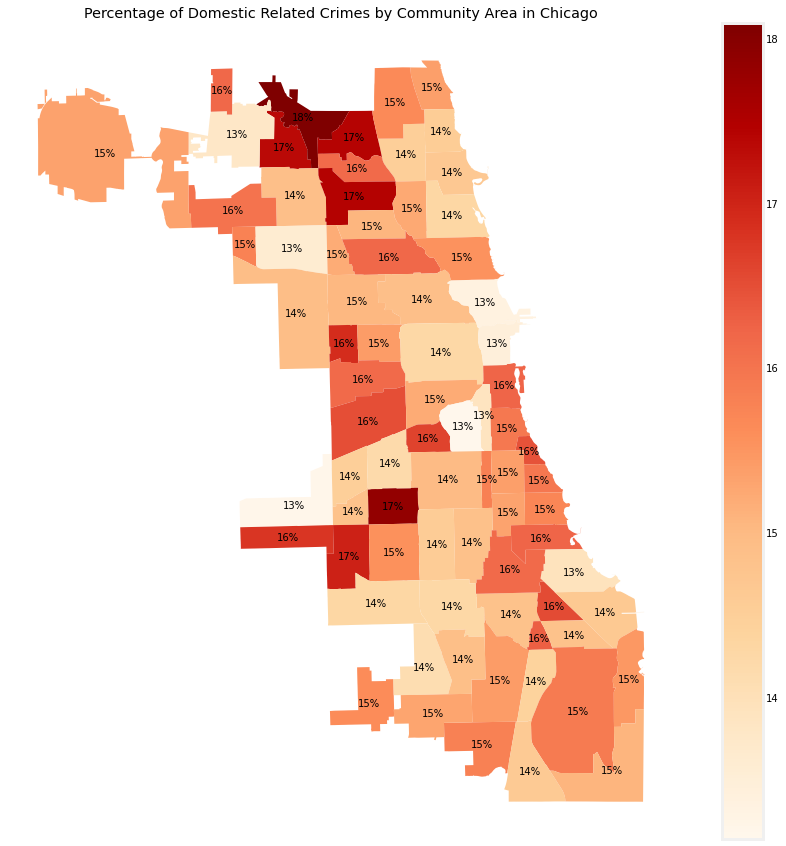

In [50]:
import pandas as pd
import geopandas as gpd

# 加载数据集
df2 = df

# 匹配GeoJSON中的area_numbe与CSV中的Community Area
chicago = gpd.read_file('Chicago_Crimes_DataSet/chicago_community_areas.geojson')
df2['area_numbe'] = df['Community Area'].astype(int).astype(str)
df2 = df2.merge(chicago, on='area_numbe')

# 计算每个Community Area的犯罪事件总数和涉及家暴的事件总数
crime_count = df2.groupby('area_numbe').size().reset_index(name='crime_count')
domestic_count = df2.loc[df['Domestic'] == True].groupby('area_numbe').size().reset_index(name='domestic_count')

# 将结果与GeoJSON合并，并计算家暴犯罪占比
chicago = chicago.merge(crime_count, on='area_numbe')
chicago = chicago.merge(domestic_count, on='area_numbe', how='left').fillna(0)
chicago['domestic_ratio'] = chicago['domestic_count'] / chicago['crime_count'] * 100

# 排序并打印前三个区
top_3 = chicago[['community', 'domestic_ratio']].sort_values('domestic_ratio', ascending=False).head(3)
print(top_3)

# 在地图上呈现
ax = chicago.plot(column='domestic_ratio', cmap='OrRd', legend=True, figsize=(15, 15))
ax.set_title("Percentage of Domestic Related Crimes by Community Area in Chicago")
ax.set_axis_off()

for idx, row in chicago.iterrows():
    ax.annotate(text=str(int(row['domestic_ratio'])) + '%', xy=row['geometry'].centroid.coords[0], 
                horizontalalignment='center', verticalalignment='center')


<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Based on the analysis of the crime data in Chicago, the community areas with the highest percentage of domestic-related crimes are Forest Glen, Gage Park, and Irving Park, with domestic ratios of 18.09%, 17.85%, and 17.44% respectively. These findings suggest that domestic violence is a significant issue in these areas and that policymakers and law enforcement agencies may need to implement targeted interventions to address this problem. Further research may be needed to investigate the underlying factors contributing to the high rates of domestic violence in these communities and to develop effective strategies for prevention and intervention.</strong></p> 

<a id = '2.3'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>3.Weekly distribution of crime incidents</strong></p> 

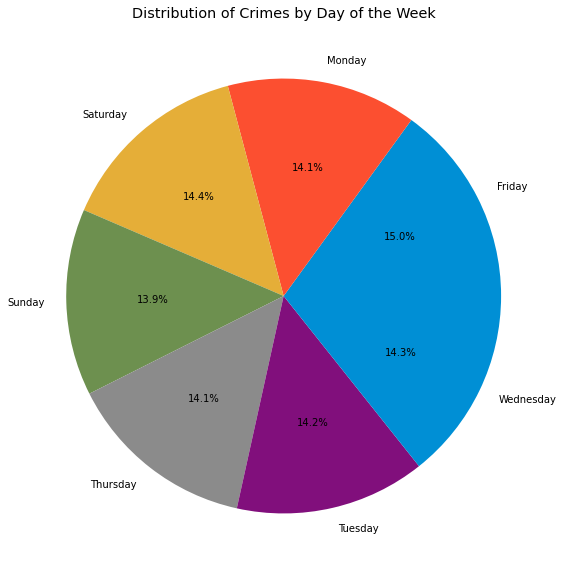

Crimes by Day of the Week:
 DayOfWeek
Friday       218643
Monday       205762
Saturday     209743
Sunday       202212
Thursday     205851
Tuesday      206129
Wednesday    208374
Name: ID, dtype: int64


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df3 = df

# Convert the Date column to datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

# Extract the day of the week from the Date column
df3['DayOfWeek'] = df3['Date'].dt.day_name()

# Group the crimes by day of the week and count the number of crimes on each day
crimes_by_day = df3.groupby('DayOfWeek')['ID'].count()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a pie chart of the distribution
ax.pie(crimes_by_day, labels=crimes_by_day.index, autopct='%1.1f%%')
ax.set_title('Distribution of Crimes by Day of the Week')

# Show the plot
plt.show()

# Print the percentage of crimes on each day
print('Crimes by Day of the Week:\n', crimes_by_day)


<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The distribution of crimes by day of the week shows that the number of crimes committed is relatively evenly spread throughout the week. The highest number of crimes occur on Saturdays, followed closely by Fridays and Wednesdays. Sundays have the lowest number of crimes reported. However, the differences in the number of crimes committed on each day of the week are relatively small. The results suggest that there is no significant correlation between the day of the week and the occurrence of crimes. Further analysis is needed to investigate the potential factors that contribute to the variations in the number of crimes reported on different days of the week.</strong></p> 

<a id = '2.4'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>4.Analysis of crime situation related to Location type.</strong></p> 

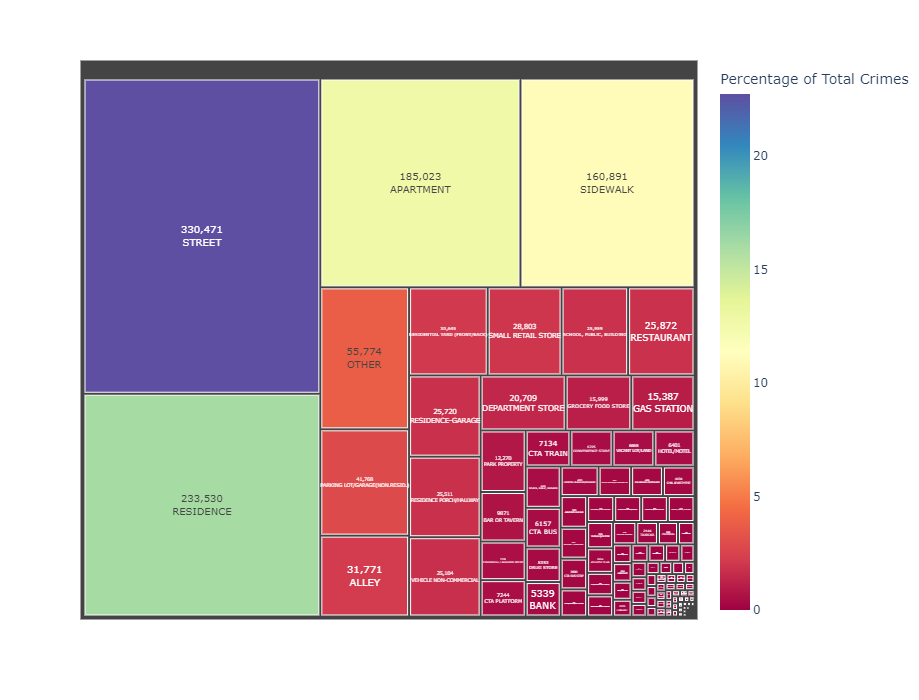

In [14]:
import pandas as pd
import plotly.express as px

# Load the dataset
df4 = pd.read_csv('Chicago_Crimes_DataSet/Chicago_Crimes_2012_to_2017.csv')

# Count the number of crimes by location description
crime_counts = df4['Location Description'].value_counts()

# Create a dataframe with the location descriptions and counts
crime_df = pd.DataFrame({'Location Description': crime_counts.index, 'Count': crime_counts.values})

# Calculate the percentage of crimes in each location
crime_df['Percentage'] = crime_df['Count'] / sum(crime_df['Count']) * 100

# Create the Treemap figure
fig = px.treemap(crime_df, path=['Location Description'], values='Count', color='Percentage',height=700,
                 color_continuous_scale='spectral', labels={'Count': 'Number of Crimes', 'Percentage': 'Percentage of Total Crimes'})

# Update the text position and font size
fig.update_traces(textposition='middle center', textfont=dict(size=10), texttemplate='%{value}<br>%{label}')

# Show the figure
fig.show()


In [15]:
# Sort the dataframe by percentage in descending order
crime_df = crime_df.sort_values(by='Percentage', ascending=False)

# Select only the top five rows
top_five = crime_df[['Location Description', 'Percentage']].head(5)

# Print the top five locations by percentage
print(top_five.to_string(index=False))


Location Description  Percentage
              STREET   22.711909
           RESIDENCE   16.049554
           APARTMENT   12.715868
            SIDEWALK   11.057375
               OTHER    3.833117


<li style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>The table shows the top five location descriptions where crimes occur in the dataset. The "Street" category has the highest percentage of crimes, accounting for 22.7% of all crimes. "Residence" and "Apartment" are the second and third most common locations for crimes, with percentages of 16.0% and 12.7%, respectively. "Sidewalk" ranks fourth, accounting for 11.1% of crimes. Finally, "Other" is the fifth most common location for crimes, with a percentage of 3.8%. These results suggest that crimes in this dataset are most likely to occur in outdoor public spaces such as streets and sidewalks, followed by residential areas.</strong></li>

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

In [16]:
df = pd.read_csv('Chicago_Crimes_DataSet/Chicago_Crimes_2012_to_2017.csv')
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
df.fillna(0, inplace = True)
# Merge Crime Dataset with Economy DataSet

# get the economy data
poverty = pd.read_excel('Chicago_Economy_DataSet/poverty.xlsx')
median_house_income = pd.read_excel('Chicago_Economy_DataSet/median_house_income.xlsx')
black = pd.read_excel('Chicago_Economy_DataSet/black.xlsx')
naturecitizenship = pd.read_excel('Chicago_Economy_DataSet/citizenship.xlsx')
education = pd.read_excel('Chicago_Economy_DataSet/education.xlsx')
health_insurance = pd.read_excel('Chicago_Economy_DataSet/health_insurance.xlsx')
hispanic_latino = pd.read_excel('Chicago_Economy_DataSet/hispanic_latino.xlsx')
noncitizenship = pd.read_excel('Chicago_Economy_DataSet/noncitizenship.xlsx')
owner_occupied = pd.read_excel('Chicago_Economy_DataSet/owner_occupied.xlsx')

merged = pd.merge(df, poverty, on='Community Area')
merged1 = pd.merge(df, median_house_income, on='Community Area')
merged2 = pd.merge(df, black, on='Community Area')
merged3 = pd.merge(df, naturecitizenship, on='Community Area')
merged4 = pd.merge(df, health_insurance, on='Community Area')
merged5 = pd.merge(df, hispanic_latino, on='Community Area')
merged6 = pd.merge(df, noncitizenship, on='Community Area')
merged7 = pd.merge(df, owner_occupied, on='Community Area')
merged8 = pd.merge(df, education, on='Community Area')

df1 = merged
df1['poverty'] = merged.lookup(merged.index,merged['Year'])
df1['median_house_income'] = merged1.lookup(merged1.index,merged1['Year'])
df1['black'] = merged2.lookup(merged2.index,merged2['Year'])
df1['naturecitizenship'] = merged3.lookup(merged3.index,merged3['Year'])
df1['health_insurance'] = merged4.lookup(merged4.index,merged4['Year'])
df1['hispanic_latino'] = merged5.lookup(merged5.index,merged5['Year'])
df1['noncitizenship'] = merged6.lookup(merged6.index,merged6['Year'])
df1['owner_occupied'] = merged7.lookup(merged7.index,merged7['Year'])
df1['education'] = merged8.lookup(merged8.index,merged8['Year'])

df1.to_csv('test.csv')
data = pd.read_csv('test.csv')
data = data.drop(columns =['2012','2013','2014','2015','2016','2017','IUCR',"Description"],axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

object_features = ["Case Number", "Date", "Block", "Primary Type", 
                    "Location Description", "FBI Code",
                    "Updated On", "Location"]
for feature in object_features:
    data[feature]=LabelEncoder().fit_transform(data[feature])
    
data.head()

Unnamed: 0.1  Unnamed: 0        ID  Case Number    Date  Block  \
0             0           3  10508693      1259878  193027   6516   
1             1       48110  10448396      1224287  113700   9284   
2             2       52366  10495378      1251596  175514   7416   
3             3       57943     20859       428099  188612   9233   
4             4       63024  10508736      1259927  194418  15986   

   Primary Type  Location Description  Arrest  Domestic  Beat  District  Ward  \
0             2                    18    True      True  1022      10.0  24.0   
1             3                    18   False     False  1024      10.0  24.0   
2            32                   135    True     False  1021      10.0  24.0   
3            10                    16    True     False  1024      10.0  24.0   
4             1                    18    True      True  1133      11.0  24.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On  \
0            29.0        10     1154907.0     1893681.0  2016         305   
1            29.0         6     1153729.0     1890276.0  2016         306   
2            29.0        17     1154286.0     1892167.0  2016         306   
3            29.0         0     1153059.0     1890107.0  2013         306   
4            29.0         4     1152965.0     1894830.0  2016         307   

    Latitude  Longitude  Location  poverty  median_house_income     black  \
0  41.864073 -87.706819    192925    0.406                27397  0.873900   
1  41.854753 -87.711234    184458    0.406                27397  0.873900   
2  41.859931 -87.709139    189929    0.406                27397  0.873900   
3  41.854302 -87.713697    183911    0.470                24144  0.890039   
4  41.867265 -87.713917    196143    0.406                27397  0.873900   

   naturecitizenship  health_insurance  hispanic_latino  noncitizenship  \
0           0.011372             0.889         0.088320        0.021061   
1           0.011372             0.889         0.088320        0.021061   
2           0.011372             0.889         0.088320        0.021061   
3           0.008618             0.828         0.070019        0.025740   
4           0.011372             0.889         0.088320        0.021061   

   owner_occupied  education  
0           0.245     0.1237  
1           0.245     0.1237  
2           0.245     0.1237  
3           0.250     0.1100  
4           0.245     0.1237

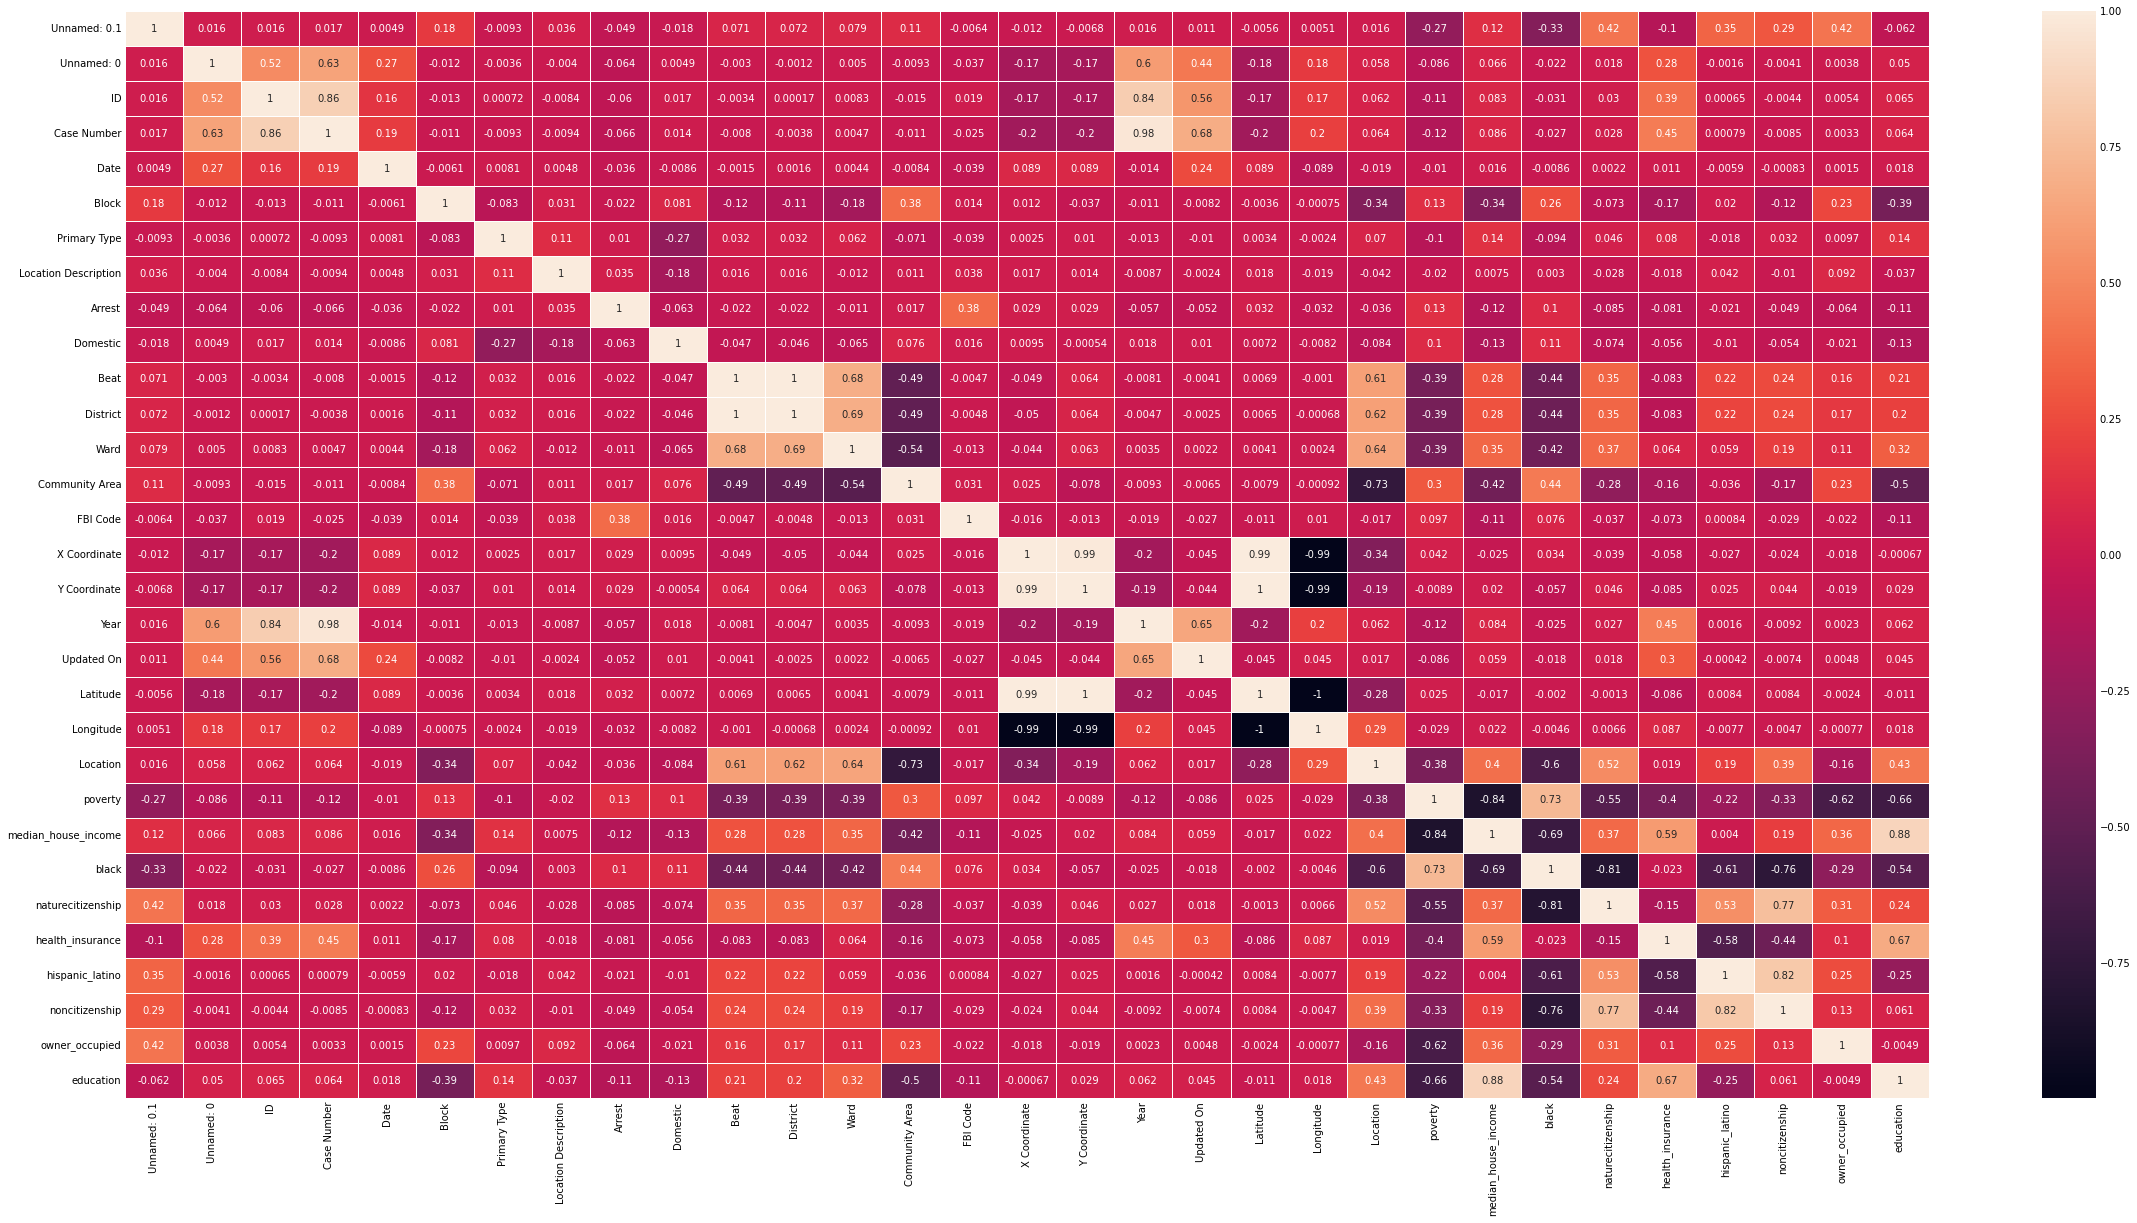

In [18]:
plt.figure(figsize = (36, 20))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [19]:
correlation = data.corr()['Primary Type'].abs().sort_values(ascending = False)
correlation

Primary Type            1.000000
Domestic                0.266836
education               0.143164
median_house_income     0.139249
Location Description    0.112288
poverty                 0.101108
black                   0.094331
Block                   0.082833
health_insurance        0.080434
Community Area          0.070855
Location                0.070278
Ward                    0.062362
naturecitizenship       0.046366
FBI Code                0.039151
Beat                    0.032409
District                0.032054
noncitizenship          0.031606
hispanic_latino         0.018144
Year                    0.012897
Y Coordinate            0.010279
Arrest                  0.010178
Updated On              0.010095
owner_occupied          0.009675
Case Number             0.009325
Unnamed: 0.1            0.009299
Date                    0.008076
Unnamed: 0              0.003608
Latitude                0.003370
X Coordinate            0.002514
Longitude               0.002374
ID        

In [20]:
# dropping columns that are not useful(which is low than 0.01)

useless_col = ['owner_occupied','Case Number','Unnamed: 0.1', 'Date', 'Unnamed: 0', 'Longitude','X Coordinate', 'ID','Latitude']

data.drop(useless_col, axis = 1, inplace = True)

In [21]:
data.var()

Block                   9.398763e+07
Primary Type            1.411251e+02
Location Description    1.675417e+03
Arrest                  1.919809e-01
Domestic                1.282452e-01
Beat                    4.783784e+05
District                4.767494e+01
Ward                    1.906043e+02
Community Area          4.596774e+02
FBI Code                4.222913e+01
Y Coordinate            8.930387e+10
Year                    2.101281e+00
Updated On              5.181823e+04
Location                1.043733e+10
poverty                 1.296835e-02
median_house_income     5.766074e+08
black                   1.564294e-01
naturecitizenship       3.495513e-03
health_insurance        4.472351e-03
hispanic_latino         6.618987e-02
noncitizenship          7.383363e-03
education               5.702499e-02
dtype: float64

In [22]:
# normalizing numerical variables

from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# select the columns to be scaled
cols_to_scale = ['Block', 'Location Description', 'Beat', 'District', 'Ward', 
                 'Community Area', 'FBI Code', 'Y Coordinate','Updated On', 
                 'Year', 'Location','poverty',	'median_house_income',	'black',
                 'naturecitizenship'	,'health_insurance'	,'hispanic_latino',
                 'noncitizenship',	'education']

for feature in cols_to_scale:
    data[feature] = data[feature].replace(to_replace="NaN", value=np.NaN)
    data[feature] = data[feature].fillna(data[feature].median(skipna=True))

# fit and transform the selected columns using the scaler object
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# print the normalized dataframe
data

Block  Primary Type  Location Description  Arrest  Domestic  \
0        0.198944             2              0.126761    True      True   
1        0.283455             3              0.126761   False     False   
2        0.226422            32              0.950704    True     False   
3        0.281898            10              0.112676    True     False   
4        0.488077             1              0.126761    True      True   
...           ...           ...                   ...     ...       ...   
1456656  0.937258             2              0.859155   False     False   
1456657  0.903062             8              0.788732   False     False   
1456658  0.954081            31              0.901408   False     False   
1456659  0.937410             8              0.788732   False     False   
1456660  0.199463             8              0.161972   False     False   

             Beat  District  Ward  Community Area  FBI Code  Y Coordinate  \
0        0.375825  0.322581  0.48        0.368421      0.40      0.970336   
1        0.376650  0.322581  0.48        0.368421      0.24      0.968591   
2        0.375413  0.322581  0.48        0.368421      0.68      0.969560   
3        0.376650  0.322581  0.48        0.368421      0.00      0.968504   
4        0.421617  0.354839  0.48        0.368421      0.16      0.970924   
...           ...       ...   ...             ...       ...           ...   
1456656  0.867162  0.709677  0.38        0.934211      0.40      0.000000   
1456657  0.870462  0.709677  0.38        0.934211      0.52      0.000000   
1456658  0.866749  0.709677  0.38        0.934211      0.28      0.000000   
1456659  0.866337  0.709677  0.38        0.934211      0.52      0.000000   
1456660  0.866749  0.709677  0.42        0.934211      0.52      0.000000   

         Year  Updated On  Location   poverty  median_house_income     black  \
0         0.8    0.318372  0.523860  0.607477             0.110899  0.873688   
1         0.8    0.319415  0.500869  0.607477             0.110899  0.873688   
2         0.8    0.319415  0.515725  0.607477             0.110899  0.873688   
3         0.2    0.319415  0.499384  0.707165             0.081797  0.889854   
4         0.8    0.320459  0.532598  0.607477             0.110899  0.873688   
...       ...         ...       ...       ...                  ...       ...   
1456656   1.0    0.086639  1.000000  0.052960             0.756989  0.341171   
1456657   1.0    0.090814  1.000000  0.052960             0.756989  0.341171   
1456658   1.0    0.090814  1.000000  0.052960             0.756989  0.341171   
1456659   1.0    0.090814  1.000000  0.052960             0.756989  0.341171   
1456660   1.0    0.090814  1.000000  0.052960             0.756989  0.341171   

         naturecitizenship  health_insurance  hispanic_latino  noncitizenship  \
0                 0.028431          0.726994         0.095362        0.058532   
1                 0.028431          0.726994         0.095362        0.058532   
2                 0.028431          0.726994         0.095362        0.058532   
3                 0.020111          0.539877         0.075602        0.071535   
4                 0.028431          0.726994         0.095362        0.058532   
...                    ...               ...              ...             ...   
1456656           0.070237          0.960123         0.053356        0.033000   
1456657           0.070237          0.960123         0.053356        0.033000   
1456658           0.070237          0.960123         0.053356        0.033000   
1456659           0.070237          0.960123         0.053356        0.033000   
1456660           0.070237          0.960123         0.053356        0.033000   

         education  
0         0.104457  
1         0.104457  
2         0.104457  
3         0.087400  
4         0.104457  
...            ...  
1456656   0.635209  
1456657   0.635209  
1456658   0.635209  
1456659   0.635209  
1456660   0.635209  


In [23]:
data.var()

Block                     0.087613
Primary Type            141.125095
Location Description      0.083090
Arrest                    0.191981
Domestic                  0.128245
Beat                      0.081415
District                  0.049610
Ward                      0.076242
Community Area            0.079584
FBI Code                  0.067567
Y Coordinate              0.023448
Year                      0.084051
Updated On                0.056461
Location                  0.076956
poverty                   0.031454
median_house_income       0.046150
black                     0.156956
naturecitizenship         0.031889
health_insurance          0.042082
hispanic_latino           0.077165
noncitizenship            0.057027
education                 0.088393
dtype: float64

In [24]:
y = data ['Primary Type']
X = data.drop(['Primary Type'], axis=1)
X.shape,y.shape

((1456661, 21), (1456661,))

In [25]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<a id = '4.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

<a id = '4.1'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p> 

In [26]:
# Fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7030969393078981
Confusion Matrix : 
[[    0     0   463 ...     0     0     0]
 [    0   142 11683 ...     0  8111     0]
 [    0    21 54157 ...     0  9860     0]
 ...
 [    0     0   110 ...     0    56     0]
 [    0     8  2887 ...     0 78180     0]
 [    0     0     0 ...     0     0     6]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       559
           1       0.70      0.01      0.01     22870
           2       0.74      0.82      0.78     66144
           3       0.54      0.24      0.34     21149
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00      1748
           6       0.83      0.93      0.88     38801
           7       0.56      0.55      0.55      9173
           8       0.89      0.60      0.72     18869
           9       0.00      0.00      0.00       544
          10       0.00      0.00 

<a id = '4.2'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8188463502908014
Confusion Matrix : 
[[   26    25   456 ...     0     8     0]
 [    7 10645  7980 ...     1  1798     0]
 [   31  3872 57851 ...     0  2168     1]
 ...
 [    0    75    75 ...     0    12     0]
 [    1  1267  1591 ...     0 75682     0]
 [    0     0    10 ...     0     0  2224]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.29      0.05      0.08       559
           1       0.58      0.47      0.52     22870
           2       0.80      0.87      0.84     66144
           3       0.77      0.77      0.77     21149
           4       0.22      0.20      0.21        10
           5       0.46      0.13      0.20      1748
           6       0.92      0.94      0.93     38801
           7       0.60      0.60      0.60      9173
           8       0.92      0.84      0.88     18869
           9       0.93      0.41      0.57       544
          10       0.94      0.37      0.53       

<a id = '4.3'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.964812750229291
Confusion Matrix : 
[[  557     0     0 ...     0     0     0]
 [    0 22647     0 ...   223     0     0]
 [    0     0 66144 ...     0     0     0]
 ...
 [    0   161     0 ...    10     0     0]
 [    0     0     0 ...     0 82055     0]
 [    0     0     0 ...     0     0  4261]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       559
           1       0.99      0.99      0.99     22870
           2       1.00      1.00      1.00     66144
           3       1.00      1.00      1.00     21149
           4       0.07      0.30      0.11        10
           5       0.93      0.92      0.93      1748
           6       1.00      1.00      1.00     38801
           7       0.64      0.66      0.65      9173
           8       1.00      1.00      1.00     18869
           9       1.00      0.99      1.00       544
          10       1.00      1.00      1.

<a id = '4.4'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p> 

In [29]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9667459345463333
Confusion Matrix : 
[[  428     0    94 ...     0     0     0]
 [    0 22792    39 ...    10     1     0]
 [    0    33 66094 ...     0     5     0]
 ...
 [    0   169     0 ...     2     0     0]
 [    0     0     6 ...     0 82049     0]
 [    0     0     0 ...     0     0  4181]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       559
           1       0.98      1.00      0.99     22870
           2       1.00      1.00      1.00     66144
           3       1.00      1.00      1.00     21149
           4       0.25      0.20      0.22        10
           5       0.89      0.73      0.80      1748
           6       0.99      1.00      1.00     38801
           7       0.74      0.67      0.70      9173
           8       1.00      1.00      1.00     18869
           9       0.96      0.94      0.95       544
          10       0.98      0.81      0

<a id = '4.5'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p> 

In [30]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.971883701388927
Confusion Matrix : 
[[  557     0     0 ...     0     0     0]
 [    0 22857     0 ...    13     0     0]
 [    0     0 66144 ...     0     0     0]
 ...
 [    0   169     0 ...     2     0     0]
 [    0     0     0 ...     0 82055     0]
 [    0     0     0 ...     0     0  4295]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       559
           1       0.99      1.00      1.00     22870
           2       1.00      1.00      1.00     66144
           3       1.00      1.00      1.00     21149
           4       0.33      0.30      0.32        10
           5       0.92      0.98      0.95      1748
           6       1.00      1.00      1.00     38801
           7       0.72      0.65      0.68      9173
           8       1.00      1.00      1.00     18869
           9       1.00      0.99      1.00       544
          10       1.00      1.00 

<a id = '4.6'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p> 

In [31]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9123970936331234
Confusion Matrix : 
[[  534     0     4 ...     0     0     0]
 [   15 22126   483 ...     2    21     0]
 [   52   255 64627 ...    11    40     0]
 ...
 [    0   153    11 ...     0     0     0]
 [   38   726  2733 ...     0 77798     0]
 [    1     9     2 ...     0     0  4205]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.96      0.75       559
           1       0.91      0.97      0.94     22870
           2       0.93      0.98      0.95     66144
           3       1.00      0.95      0.97     21149
           4       0.02      0.10      0.03        10
           5       0.00      0.00      0.00      1748
           6       1.00      0.95      0.97     38801
           7       0.68      0.56      0.61      9173
           8       0.99      0.94      0.97     18869
           9       1.00      0.70      0.83       544
          10       0.00      0.00

<a id = '4.7'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>XgBoost Classifier</strong></p> 

In [32]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9756869120126536
Confusion Matrix : 
[[  557     0     0 ...     0     0     0]
 [    0 22870     0 ...     0     0     0]
 [    0     0 66144 ...     0     0     0]
 ...
 [    0   170     0 ...     0     0     0]
 [    0     0     0 ...     0 82055     0]
 [    0     0     0 ...     0     0  4299]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       559
           1       0.99      1.00      1.00     22870
           2       1.00      1.00      1.00     66144
           3       1.00      1.00      1.00     21149
           4       0.50      0.20      0.29        10
           5       0.92      1.00      0.96      1748
           6       1.00      1.00      1.00     38801
           7       0.78      0.69      0.73      9173
           8       1.00      1.00      1.00     18869
           9       1.00      1.00      1.00       544
          10       1.00      1.00

<a id = '4.8'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p> 

In [33]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 1.0014762	total: 3.52s	remaining: 5m 48s
1:	learn: 4.4842977	total: 6.12s	remaining: 4m 59s
2:	learn: 448.0797461	total: 8.79s	remaining: 4m 44s
3:	learn: 1828.4033638	total: 11.6s	remaining: 4m 38s
4:	learn: 2163.4590209	total: 14.5s	remaining: 4m 36s
5:	learn: 543.8278404	total: 17.4s	remaining: 4m 32s
6:	learn: 499.4815133	total: 20.1s	remaining: 4m 27s
7:	learn: 463.3452341	total: 22.7s	remaining: 4m 21s
8:	learn: 400.1935794	total: 25.3s	remaining: 4m 15s
9:	learn: 301.2618592	total: 28.2s	remaining: 4m 13s
10:	learn: 328.7573425	total: 31.1s	remaining: 4m 11s
11:	learn: 326.7148245	total: 34s	remaining: 4m 9s
12:	learn: 284.7939720	total: 36.7s	remaining: 4m 5s
13:	learn: 246.2083953	total: 39.4s	remaining: 4m 1s
14:	learn: 218.5380871	total: 42.1s	remaining: 3m 58s
15:	learn: 302.4180072	total: 45.1s	remaining: 3m 56s
16:	learn: 283.4308847	total: 48s	remaining: 3m 54s
17:	learn: 257.6146268	total: 50.7s	remaining: 3m 51s
18:	learn: 227.9043492

In [34]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9560145647863886
Confusion Matrix : 
[[    0     0   557 ...     0     0     0]
 [ 1426 20535   356 ...     0     0     0]
 [   59   153 65932 ...     0     0     0]
 ...
 [    1   163     0 ...     0     0     0]
 [    0     0     0 ...     0 82055     0]
 [    0     0     0 ...     0     0  4298]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       559
           1       0.93      0.90      0.91     22870
           2       0.98      1.00      0.99     66144
           3       1.00      1.00      1.00     21149
           4       0.00      0.00      0.00        10
           5       0.93      0.79      0.85      1748
           6       1.00      1.00      1.00     38801
           7       0.74      0.62      0.67      9173
           8       0.99      0.99      0.99     18869
           9       1.00      0.99      1.00       544
          10       1.00      0.72

<a id = '4.9'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p> 

In [35]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9620337977735428
Confusion Matrix : 
[[  358     2   164 ...     0     2     0]
 [    0 22252   467 ...    38    48     0]
 [    2   113 65913 ...     0    52     0]
 ...
 [    0   153     9 ...     6     2     0]
 [    0    30    76 ...     1 81909     0]
 [    0     0     0 ...     0     0  4086]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       559
           1       0.98      0.97      0.98     22870
           2       0.99      1.00      0.99     66144
           3       1.00      0.98      0.99     21149
           4       0.17      0.20      0.18        10
           5       0.92      0.93      0.92      1748
           6       0.99      1.00      1.00     38801
           7       0.69      0.63      0.66      9173
           8       1.00      0.99      1.00     18869
           9       0.99      0.88      0.93       544
          10       1.00      0.99

<a id = '4.10'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p> 

In [36]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.1504039366662456
Confusion Matrix : 
[[    0     0   189 ...     0   241     0]
 [    0     0  9290 ...     0 11334     0]
 [    0     0 27810 ...     0 33496     0]
 ...
 [    0     0    96 ...     0    82     0]
 [    0     0 40802 ...     0 25680     0]
 [    0     0  1127 ...     0  2659     0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       559
           1       0.00      0.00      0.00     22870
           2       0.18      0.42      0.25     66144
           3       0.00      0.00      0.00     21149
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00      1748
           6       0.00      0.00      0.00     38801
           7       0.01      0.00      0.00      9173
           8       0.02      0.05      0.03     18869
           9       0.00      0.00      0.00       544
          10       0.00      0.00

<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [37]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
6                       XgBoost  0.975687
4          Ada Boost Classifier  0.971884
3      Random Forest Classifier  0.966746
2      Decision Tree Classifier  0.964813
8        Extra Trees Classifier  0.962034
7                     Cat Boost  0.956015
5  Gradient Boosting Classifier  0.912397
1                           KNN  0.818846
0           Logistic Regression  0.703097
9                          LGBM  0.150404

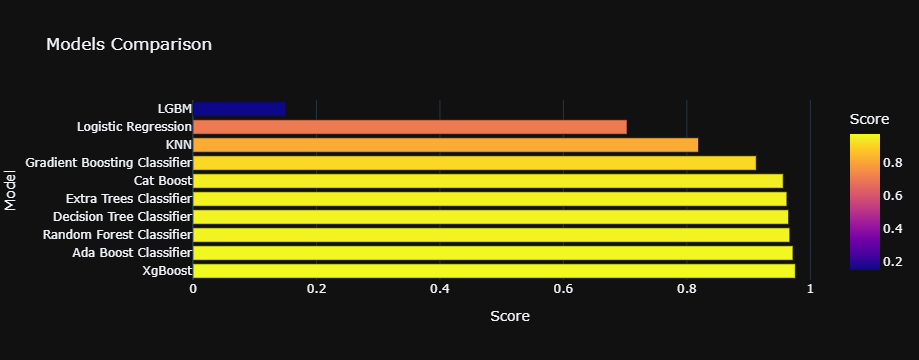

In [38]:
px.bar(data_frame = models.sort_values(by = 'Score', ascending = False), 
       x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<p style = "font-size : 30px; color : #03506f ; font-family : 'Comic Sans MS'; "><strong>We got accuracy score of 97% which is quite impresive.</strong></p> 